# DataAnalysis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('promptCount.csv', delimiter=';')

print(data.head())

         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7 Task 8 Task 9  What is your age?  \
0   58 1   96 1    NaN    NaN               24.0   
1     42    224    421      4                NaN   
2  330 0  338 0    NaN    NaN               24.0   
3     40    277    506    163                NaN   
4   54 1    NaN    NaN    NaN               30.0   

         In what subject was your bachelor?  \
0  Business Economics & Information System    
1                                       NaN   
2         International sales and marketing   
3                                       Na

## Calculate time and prompts

In [32]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                prompt_str = parts[1]  # Binary indicator (prompt) is the second part
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

# Adjusted function applications to the correct column slice
data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)
data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Convert total time from seconds to minutes and round
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)


print(data.head())


         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7  ...        In what subject was your bachelor?  \
0   58 1   96 1  ...  Business Economics & Information System    
1     42    224  ...                                       NaN   
2  330 0  338 0  ...         International sales and marketing   
3     40    277  ...                                       NaN   
4   54 1    NaN  ...          Innovation and Entrepreneurship    

  How many years of developer experience do you have?  \
0                                                  4    
1                               

## Split data into four individual sets
### Sets for each exam set with and without AI

In [33]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

## Box plot on total time spent of each exam set

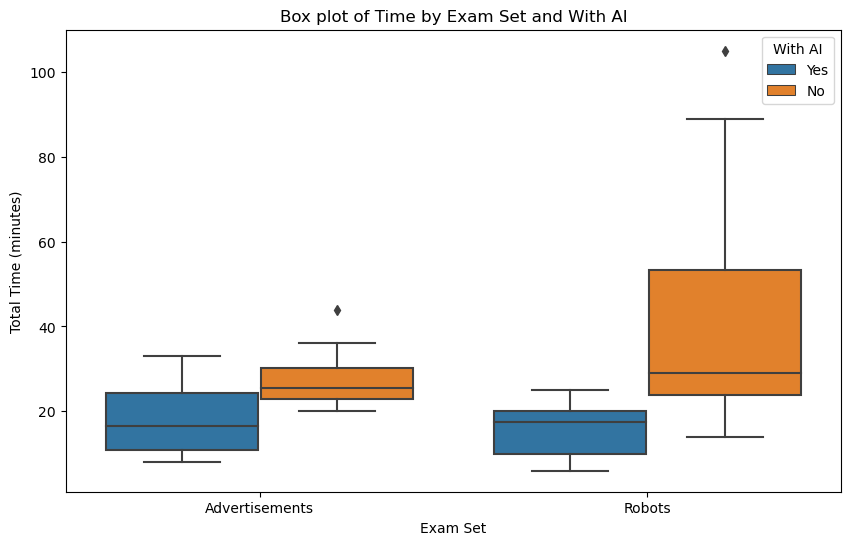

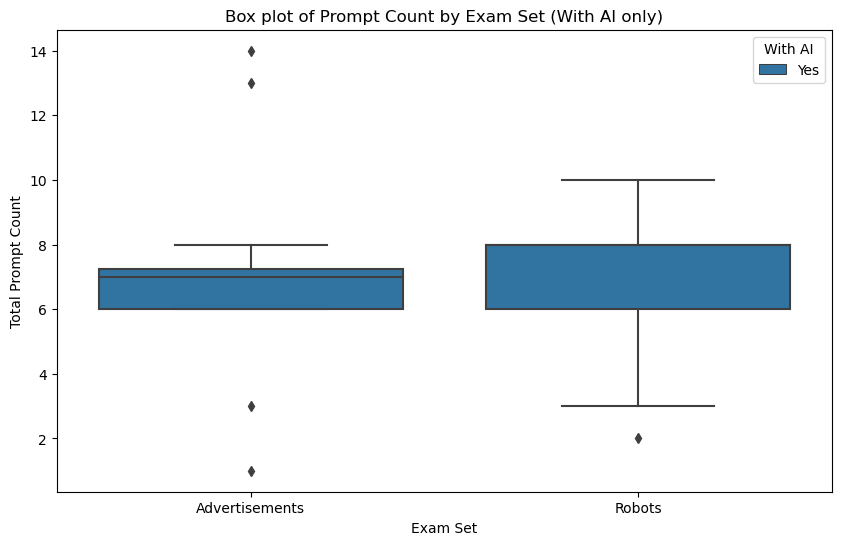

In [34]:
# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered)
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.show()

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', hue='With AI', data=data[data['With AI'] == 'Yes'])
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()



## Box plot on average time spent per task of each exam set

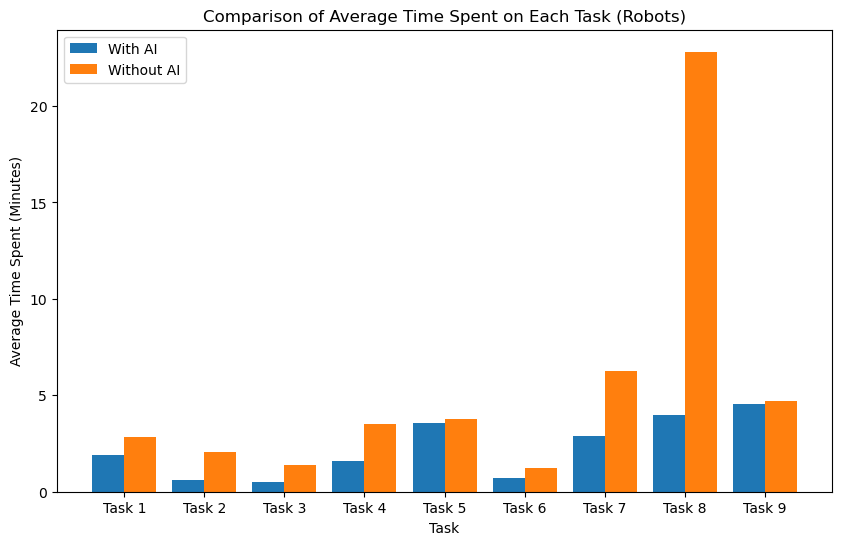

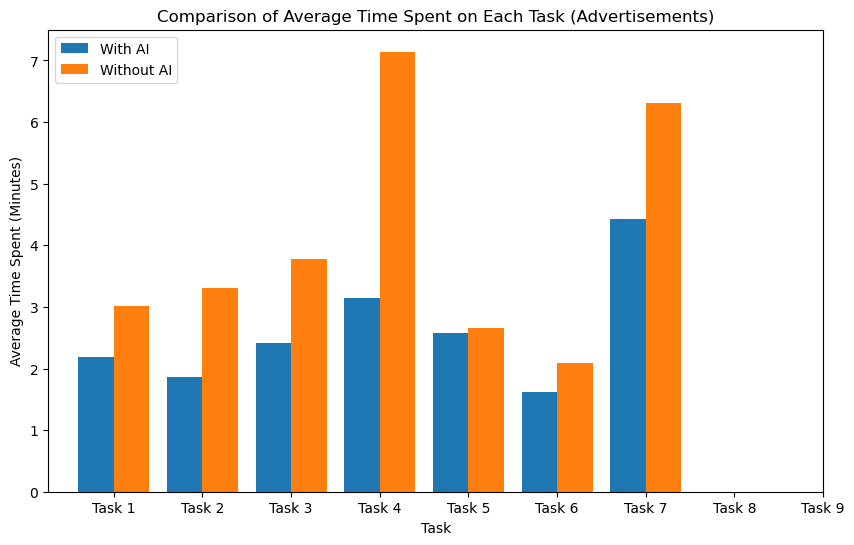

In [35]:
# Function to calculate average time spent per task
def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):  # Skip NaN values
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan  # Avoid division by zero
    return total_time / count / 60  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Extract task names
task_names = [f'Task {i}' for i in range(1, 10)]

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

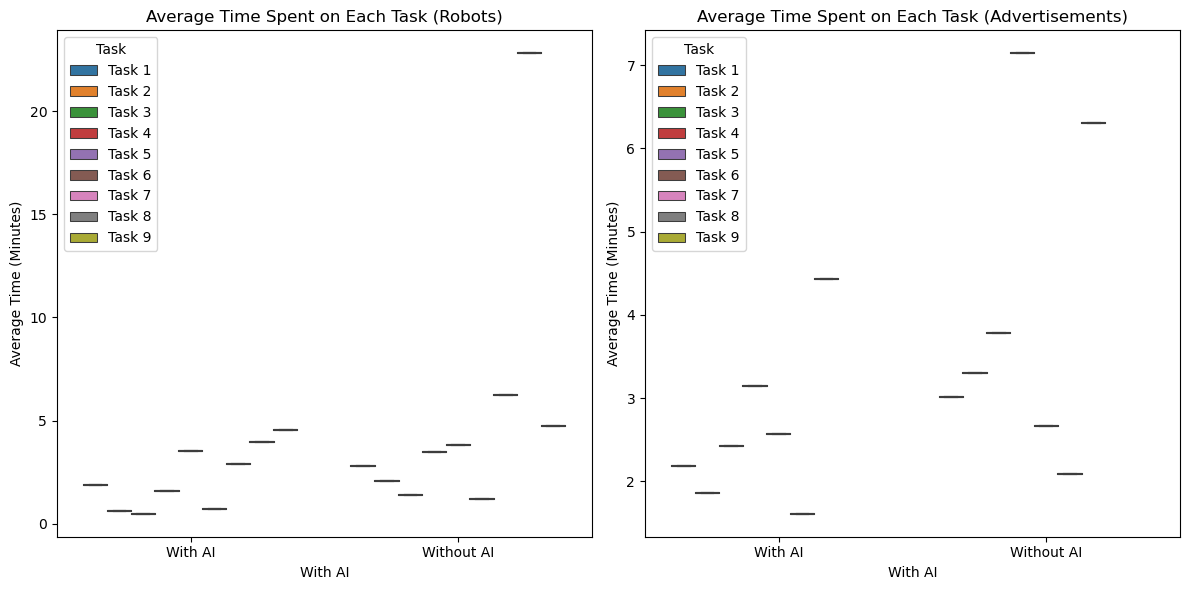

In [36]:
# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Convert the data to long format for plotting
avg_time_robots = pd.concat([avg_time_with_ai_robots, avg_time_without_ai_robots], axis=1)
avg_time_robots.columns = ['With AI', 'Without AI']
avg_time_robots['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_robots = avg_time_robots.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

avg_time_ads = pd.concat([avg_time_with_ai_ads, avg_time_without_ai_ads], axis=1)
avg_time_ads.columns = ['With AI', 'Without AI']
avg_time_ads['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_ads = avg_time_ads.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

# Create box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_robots)
plt.title('Average Time Spent on Each Task (Robots)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.subplot(1, 2, 2)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_ads)
plt.title('Average Time Spent on Each Task (Advertisements)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.tight_layout()
plt.show()

## Compare total time spend between the use of AI on exam sets

In [37]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 501.0 minutes
Total time spent on Robots with AI: 156.0 minutes
Total time used on tasks without AI in Robots are 221.15 % longer than with AI

Total time spent on Advertisements without AI: 276.0 minutes
Total time spent on Advertisements with AI: 215.0 minutes
Total time used on tasks without AI in Advertisements are 28.37 % longer than with AI


The Robots tasks show a much larger difference in time spent with versus without AI (81.92% longer without AI) compared to the Advertisements tasks (15.81% longer without AI). This substantial difference in the Robots category likely contributes to a lower P-value, indicating a statistically significant difference when AI is used.

## Statistically significan analysis

In [38]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")


T-statistic for exam set with Robots: -2.8021366735020568, P-value: 0.011004945849030258
T-statistic for exam set with Advertisements: -2.8455292197444924, P-value: 0.00999579164151388


The average input of 'Dev Exp (Years)' = 2.04
The average input of 'Java Exp (Years)' = 1.40
The average input of 'Java Coding Gap (Years)' = 0.38
The average input of 'VS Code Exp (Years)' = 2.38
The average input of 'LLM Exp (Years)' = 1.00


C:\Users\chris\AppData\Local\Temp\ipykernel_6136\3770338009.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\chris\AppData\Local\Temp\ipykernel_6136\3770338009.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=rename_dict, inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_6136\3770338009.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

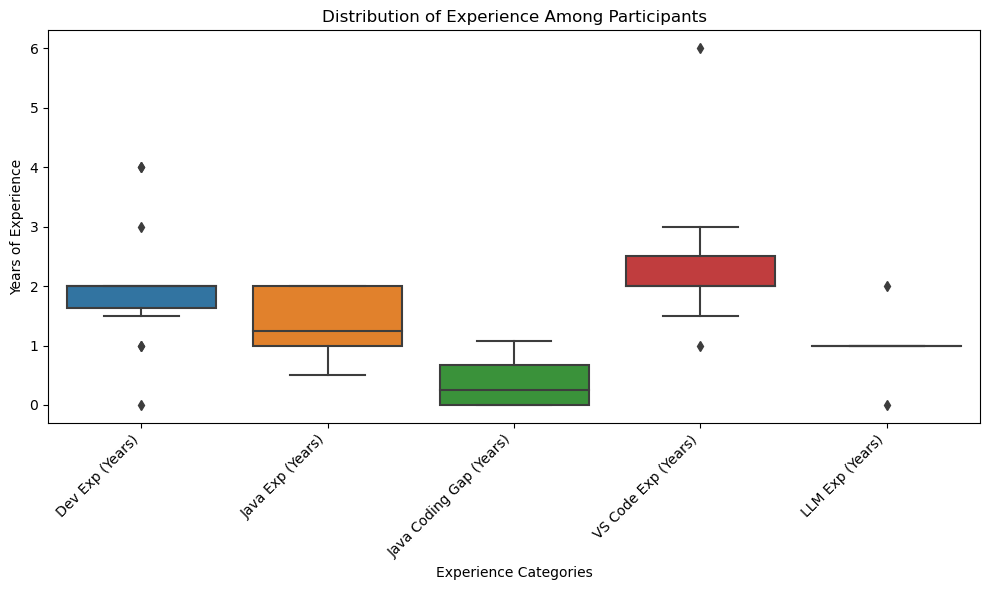

In [56]:
# Filter the data to include only every second row starting from the first one
filtered_data = data.iloc[::2]

# Convert specified columns to numeric, errors='coerce' will set non-convertible values to NaN
column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Rename dictionary for columns
rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

# Rename the columns in the DataFrame
filtered_data.rename(columns=rename_dict, inplace=True)

# Now perform numeric conversion for the renamed columns
for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Convert 'Java Coding Gap (Years)' correctly from months to years
filtered_data['Java Coding Gap (Years)'] = filtered_data['Java Coding Gap (Years)'] / 12

# Calculate averages with the renamed and converted columns
averages = filtered_data[rename_dict.values()].mean()

# Print the averages
for column, average in averages.items():
    print(f"The average input of '{column}' = {average:.2f}")

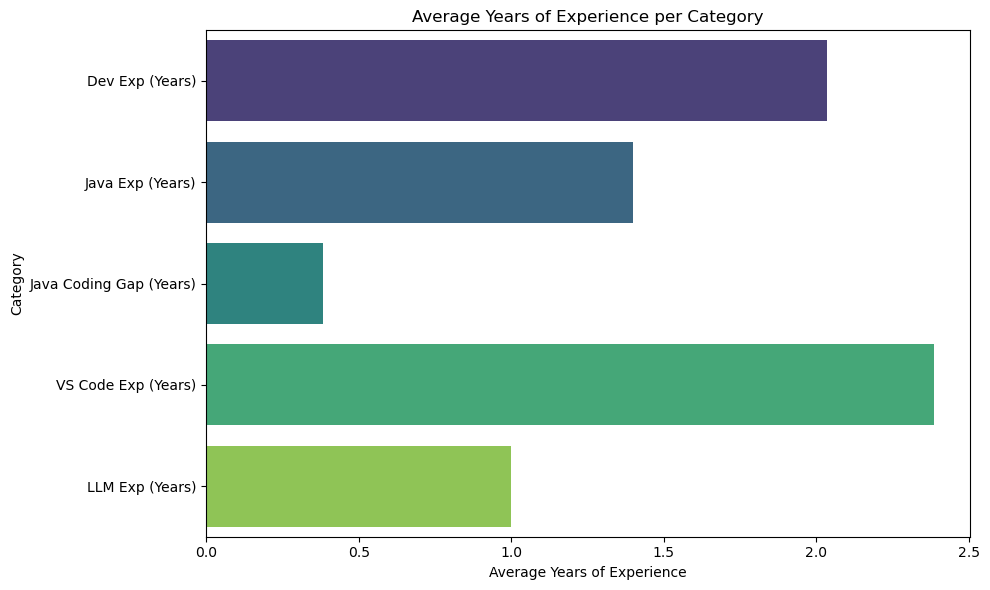

In [57]:
average_df = averages.reset_index()
average_df.columns = ['Category', 'Average Years']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Years', y='Category', data=average_df, palette="viridis")
plt.title('Average Years of Experience per Category')
plt.xlabel('Average Years of Experience')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

Participants per Experience Group:
0.0    1
1.0    3
2.0    7
3.0    1
4.0    2
Name: Dev Exp Group, dtype: int64

Average Time Spent on Tasks by Experience Group (in Minutes):
Dev Exp Group
0.0    28.000000
1.0    27.666667
2.0    19.857143
3.0    20.000000
4.0    17.500000
Name: Total_Time_Minutes, dtype: float64


C:\Users\chris\AppData\Local\Temp\ipykernel_6136\1993806969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dev Exp Group'] = filtered_data['Dev Exp (Years)'].apply(lambda x: min(int(x), 5) if pd.notnull(x) else x)


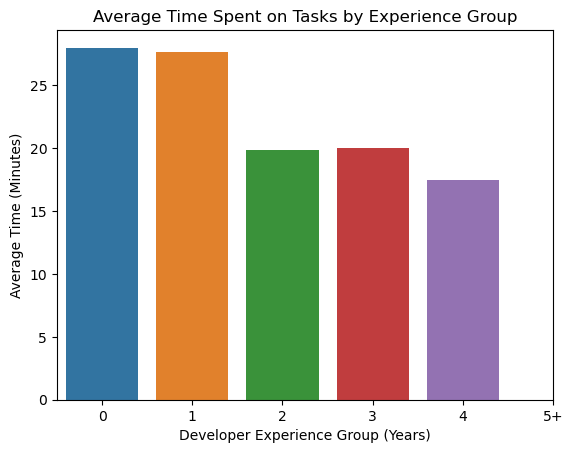

In [66]:
# Categorize participants into experience groups directly, capping at 5+ years
filtered_data['Dev Exp Group'] = filtered_data['Dev Exp (Years)'].apply(lambda x: min(int(x), 5) if pd.notnull(x) else x)

# Count the number of participants in each experience group
exp_group_counts = filtered_data['Dev Exp Group'].value_counts().sort_index()
print("Participants per Experience Group:")
print(exp_group_counts)

# Calculate the average time spent on tasks for each experience group
average_time_by_exp_group = filtered_data.groupby('Dev Exp Group')['Total_Time_Minutes'].mean()
print("\nAverage Time Spent on Tasks by Experience Group (in Minutes):")
print(average_time_by_exp_group)

# Plotting the average time spent on tasks by experience group
sns.barplot(x=average_time_by_exp_group.index, y=average_time_by_exp_group.values)
plt.title('Average Time Spent on Tasks by Experience Group')
plt.xlabel('Developer Experience Group (Years)')
plt.ylabel('Average Time (Minutes)')
plt.xticks(range(6), ['0', '1', '2', '3', '4', '5+'])  # Adjusting ticks to match experience groups
plt.show()


